# <font color = 'pickle'>**Linear Regression from scratch using gradient descent**

Linear regression is one of the most popular tools for regression models.

Let us consider an example where we have to estimate the price of the house based on its area and age. To actually train a model, we would need a dataset of different house prices along with their area and age. 

In this dataset, area and age will be know as our `features` using which we will estimate the price. The price or the predicted value will be known as `label`.

We can use linear regression model for such a problem. Let's see what actually happens in linear regression and how we can implement it.

## <font color = 'pickle'>**Linear Regression**




In this model, we have some independent variable values x (area and age in case of house price prediction) and a dependent variable y (price of the house) which is linearly dependent on x values. 

We try to generalize y as a weigthed sum of elemnts in x with some noise on the onservations.

$price = weight_{area} * area + weight_{age} * age + b$

Here b is the **bias**. The weights determine the influence of each feature on our prediction and the bias tells us what value the predicted price should take when all of the features take value 0. 

## <font color = 'pickle'>**Loss Function**

We also need to compute loss. We use sum of squared error as our ***loss function***

## <font color = 'pickle'>**Optimization**

We also need an **optimization algorithm** so that we can minimize our loss function. We will be using gradient descent.

**Let us summarize above points for linear regression:**

**Input**: $\boldsymbol{X}$ (features)

**Output**: $\mathbf{y}$ (label)

**Parameters**: $\mathbf{w}$, b (weights and bias)


The training examples are stored in matrix $\boldsymbol{X}$ row-wise <br><br>
$\boldsymbol{X} =  \begin{bmatrix}
x_1^{(1)}x_2^{(1)}\cdot\cdot\cdot x_n^{(1)} \\ x_1^{(2)}x_2^{(2)}\cdot\cdot\cdot x_n^{(2)}  \\ \cdot \\ \cdot \\ \cdot\ \\ x_1^{(m)}x_2^{(m)}\cdot\cdot\cdot x_n^{(m)} \end{bmatrix}$ , $ \mathbf{w} =\begin{bmatrix}
w_1  w_2  \cdot  \cdot  \cdot  w_n\end{bmatrix}$

We can calculale the predicted values of y for all m observations using follwoing:

\begin{equation}
\hat{\mathbf{y}}  = \boldsymbol{X} \mathbf{w^T} + b
\end{equation}
where $\boldsymbol{X} \mathbf{w^T}$ is matrix multiplication of $\boldsymbol{X}$ and $\mathbf{w^T}$ 

<b>Cost function</b>
\begin{equation}
\mathcal{L} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2 
\end{equation}

Cost Function (Vector Notation):
\begin{equation}
\mathcal{L}  = \frac{1}{m}(\mathbf{\hat{y}}  -\mathbf{y})^T (\mathbf{\hat{y}}  -\mathbf{y})
\end{equation}

Gradient of thr Loss Function with respect to $\mathbf{w}$:
\begin{equation}
\frac{2}{m}\boldsymbol{X}^T(\mathbf{\hat{y}}  -\mathbf{y})
\end{equation}

Gradient of the Loss Function with respect to $b$:
\begin{equation}
\frac{2}{m}\mathbf{1_m}^T(\mathbf{\hat{y}}  -\mathbf{y}))
\end{equation}

here $\mathbf{1_m}$ denote the column vector of all ones and length m

Gradient Descent Algorithm:

The algorithm starts with some “initial guess” for $\mathbf{w}$ and $b$, and that repeatedly changes $\mathbf{w}$ and $b$ to make  $\mathcal{L}$  smaller, until we converge to a value of $\mathbf{w}$ and $b$ minimizes $\mathcal{L}$.

\begin{equation}
\mathbf{w^T} := \mathbf{w^T} - \frac{2\alpha} {m}\boldsymbol{X}^T(\mathbf{\hat{y}}  -\mathbf{y})
\end\{equation}


\begin{equation}
b := b - \frac{2\alpha} {m}\mathbf{1_m}^T(\mathbf{\hat{y}}  -\mathbf{y})
\end\{equation}




**We will implement linear regression algorithm from sratch in this notebook using the above formulas.**

In [ ]:
# Importing numpy
import numpy as np

# Importing random library to generate random dataset
import random

In [ ]:
# To get deterministic results
random.seed(123)

## <font color = 'pickle'>**Generating a Dataset**

We will generate a dummy dataset having 1000 observations and 2 features.
The observations are sampled from standard normal distribution.

Let us have our true parameter values to be w = [3, -4.5] and b = 5.2. 

`y = Xw.T + b + noise`

We will further assume that nose will be normally distributed with mean 0 and standard deviation of 0.01. 


In [ ]:
def generate_dataset(w, b, num): 

    """
    Function to generate a dataset. 
    Input parameter : 
    w: weights, 
    b: bias 
    num: number of obervations
    Output: feature and labels of a dataset
    """
    
    # Generate X values from standard normal distribution 
    X = np.random.normal(0, 1, (num, len(np.transpose(w))))

    # Generate y values: y = Xw + b
    y = np.matmul(X, w.T) + b

    # Adding noise in labels
    
    y += np.random.normal(0, 0.01, y.shape)

    # Returning the dataset generated
    return X, y.reshape(-1, 1)

In [ ]:
# Initializing actual weight and bias values
w_true = np.array([3, -4.5]).reshape(1,-1)
b_true = 5.2

# Calling the generate_dataset function to create a dummy dataset
features, labels = generate_dataset(w_true, b_true, 1000)


In [ ]:
print(features.shape, labels.shape)

(1000, 2) (1000, 1)


## <font color = 'pickle'>**Visualization of the dataset**

[Text(0, 0.5, 'y')]

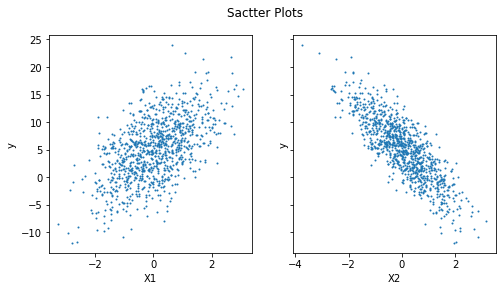

In [ ]:
# Importing matplotlib library for visualizing dataset
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
fig.suptitle('Sactter Plots')

# We will create a scatter plot between feature and labels
ax1.scatter(features[:, 0], labels,s = 1)
ax1.set(xlabel='X1')
ax1.set(ylabel='y')
ax2.scatter(features[:, 1], labels, s = 1)
ax2.set(xlabel='X2')
ax2.set(ylabel='y')



From the above visualization, we can observe a linear relation between features and label values.

## <font color = 'pickle'>**Reading the dataset**

For training our model, we will use mini batches from the dataset and use them to update our model.

To simplify this process, we will define a function which will shuffle the dataset and access it in mini batches.

In [ ]:
def read_data(batch_size, features, labels):
    """
    Function to access data in mini batches. 
    Input parameters: batch size, features, labels. 
    Output: iterator for minibatch data
    """
    
    # Number of examples in the datasets
    num = len(features)

    # Creating a list of indices from 0 to number of examples in the dataset
    indices = list(range(num))

    # The examples are read at random, in no particular order
    random.shuffle(indices)

    # Return the features and labels of the minibatch
    for i in range(0, num, batch_size):
        batch_indices = # code here
        yield # code here

Lets create a batch size of 15 and visualize the feature and data values better understanding.

In [ ]:
# Specify value for batch_size
batch_size = 15

# Call the function read_data and visualize the size of minibatch
for X, y in read_data(batch_size, features, labels):
    print(X.shape)
    print(y.shape)
    break

(15, 2)
(15, 1)


## <font color = 'pickle'>**Linear Regression Model**

In [ ]:
def linear_reg(X, w, b):
  """
  Function for linear regression y = Xw + b. 
  Input parameter: features, weights, bias. 
  Output: predicted labels
  """
  return # code here

## <font color = 'pickle'>**Loss Function**

In [ ]:
def mse_loss(ypred, y):
  """
  Squared error loss function.
  Input: actual labels and predicted labels
  Output: squared error loss
  """
  error = ypred - y
  mean_squared_error = # code here
  return mean_squared_error

## <font color = 'pickle'>**Optimization Algorithm**

In [ ]:
# weight update step
def sgd(params, params_grad, lr):
    for param, param_grad in zip(params, params_grad):
        param -= lr * param_grad
        

## <font color = 'pickle'>**Model Training**

**Model Training** involves five steps: 

- Step 0: Randomly initialize parameters / weights
- Step 1: Compute model's predictions - forward pass
- Step 2: Compute loss
- Step 3: Compute the gradients
- Step 4: Update the parameters
- Step 5: Repeat steps 1 - 4

Model training is repeating this process over and over, for many **epochs**.

An **epoch** is complete when we have used every point once for for computing the loss

We will use min-batch gardient descent. In minibatch gradient descent , we take a small batch of the data. We compute the loss for the batch and update the weights. **If there are $n$ batches, then in one epoch weights get updated $n$ times**. 

***Learning rate*** and ***epochs*** are known as hyperparameters. We have to fine tune the value of hy[erparametes using ceoss-validation.


In [ ]:
# Step 0: 
# Create a tensor weights with values from normal distribution
# We are calculating gardients manually
# Thus, we will set requires_grad to False

w = np.random.normal(0, 0.01, size=(1, 2))

# Create a tensor for bias
b = np.zeros(1)
print(w)
print(b)

[[ 0.00410227 -0.00510914]]
[0.]


In [ ]:
# Set the values for learning rate and number of epochs
lr = 0.005
epochs = 10

# Iterate over the whole dataset
for epoch in range(epochs):
    
    # Iterate over mini batch
    for X, y in read_data(batch_size, features, labels):

        # step 1 :forward pass - compute predictions
        ypred = # code here

        # step 2: Calculate minibatch loss
        batch_loss = # code here
        error = # code here

        # step 3: Compute gradient on loss with respect to weights and bias
        grad_w = # code here
        grad_b = # code here

        # step 4: Update parameters using their gradient using optimization algorithm
        sgd([np.transpose(w), b], [grad_w, grad_b], lr)  

    
    # Calculate and print loss for the complete epoch
    train_l = mse_loss(linear_reg(features, w, b), labels)

       
    print(f'epoch {epoch + 1}, loss {float(train_l.item()):f}')

epoch 1, loss 14.422132
epoch 2, loss 3.662819
epoch 3, loss 0.933118
epoch 4, loss 0.238744
epoch 5, loss 0.061192
epoch 6, loss 0.015787
epoch 7, loss 0.004150
epoch 8, loss 0.001156
epoch 9, loss 0.000380
epoch 10, loss 0.000178


We can observe that with each epoch, our loss is getting reduced hence our linear regression model is able to classify accurately.

Now since we generated the dataset ourselves we know the actual values for weights and bias, so we can check the error in both of them.

In [ ]:
w.shape

(1, 2)

In [ ]:
w_true.shape

(1, 2)

In [ ]:
# Printing error in weights and bias
print(f'Error in estimating w: {w_true - w}')
print(f'Error in estimating b: {b_true - b}')
print(f'estimated value of w: {w}')
print(f'estimated value of b: {b}')

Error in estimating w: [[ 0.00132082 -0.0047695 ]]
Error in estimating b: [0.00699006]
estimated value of w: [[ 2.99867918 -4.4952305 ]]
estimated value of b: [5.19300994]
